<a href="https://colab.research.google.com/github/KshitijAng/House-Model-Prediction-VisionVisor.in-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Data Science Regression Project: Predicting Home Prices**




# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
df1 = pd.read_csv('dataset.csv')
# df1.head()
df1.shape

(13320, 9)

# **Drop Unwanted Columns**

In [ ]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# **Data Cleaning**

* Handling NaN values

In [ ]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#Step 1
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
# df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# Step 2
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-5-92b0b3c8f153>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
# Step 3
# For values in range like 1133-1384
def isFloat(x):
  try:
    float(x)
  except:
    return False
  return True

df3[~df3['total_sqft'].apply(isFloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
# Step 4
# Remove Range
def sqftToNum(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(sqftToNum)
# df4.head(3)
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# **Feature Engineering**

In [ ]:
# Step 1
df5 = df4.copy()
df5['price/sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
# df5.groupby('location')['location'].agg('count')
# len(df5.location.unique())

# Step 2
df5.location = df5.location.apply(lambda x: x.strip())
location_stat = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [ ]:
# len(location_stat[location_stat<10])

In [ ]:
# Step 3
location_stat1 = location_stat[location_stat<10]
location_stat1

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stat1 else x)
# len(df5.location.unique())
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# **Outlier Removal**

In [ ]:
# Anomalies (Step 1)
# Remove irregular total_sqft based on the bhk
# df5[df5.total_sqft/df5.bhk<300].head()
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [ ]:
# Step 2
# Work on price/sqft column
# df6['price/sqft'].describe()
def removeOut(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf['price/sqft'])
    st = np.std(subdf['price/sqft'])
    reduced_df = subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7 = removeOut(df6)
df7.shape

(10222, 7)

# **Before Outlier Removal**

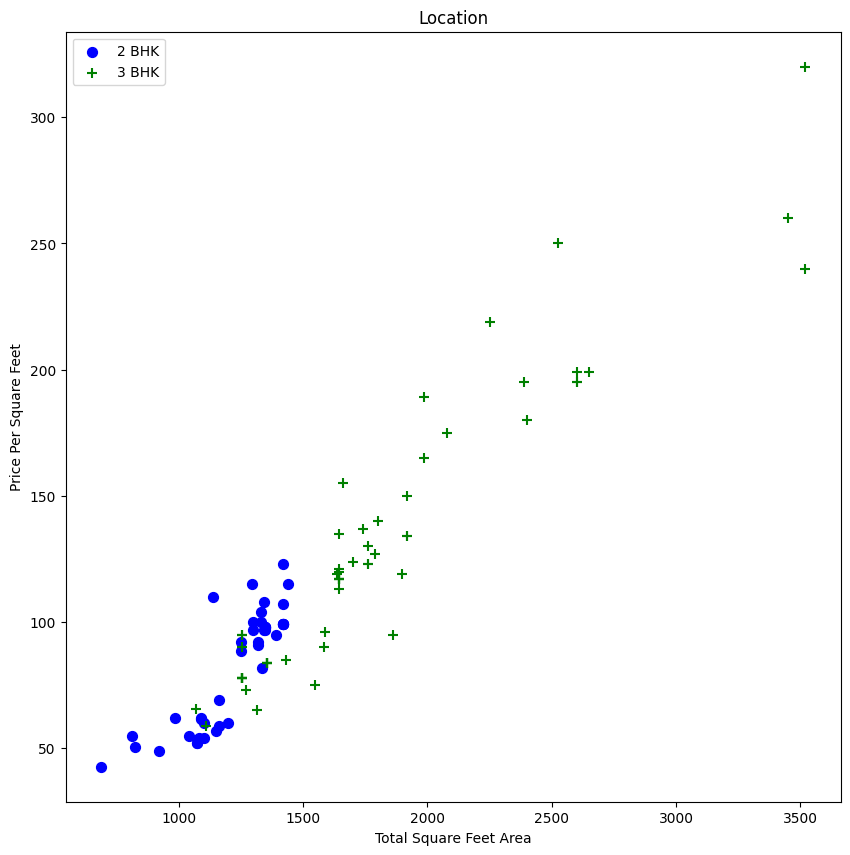

In [ ]:
#Step 3
def plot(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.rcParams['figure.figsize'] = (10,10)
  plt.scatter(bhk2.total_sqft,bhk2['price'],color="blue",label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3['price'],color="green",marker="+",label='3 BHK',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title("Location")
  plt.legend()

plot(df7,"Hebbal")

# **After Outlier Removal**

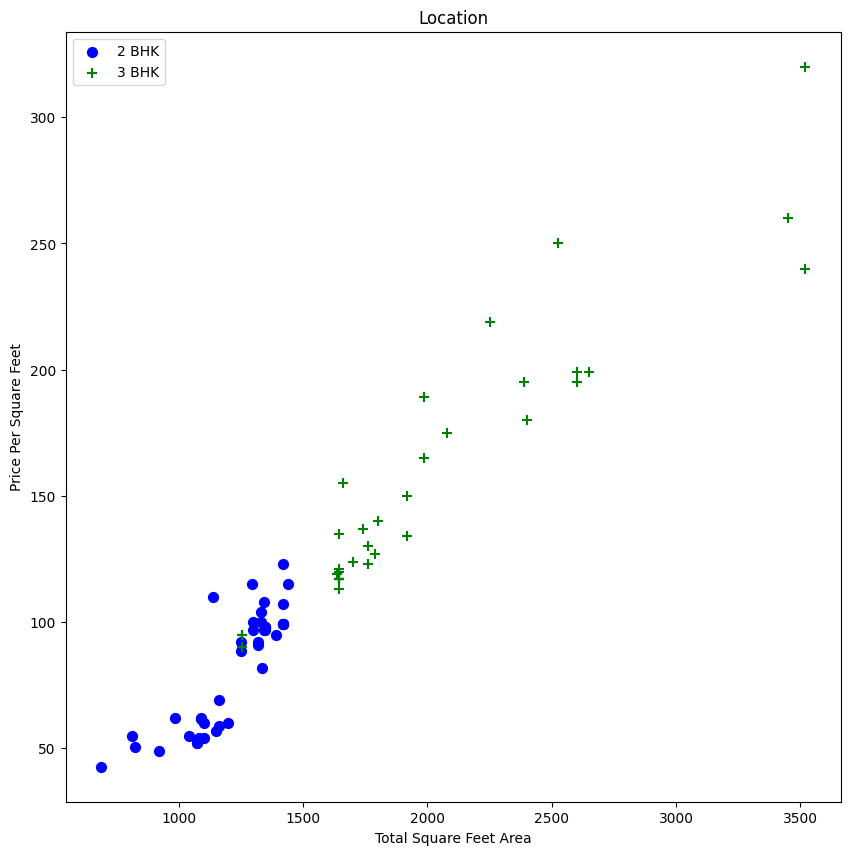

In [ ]:
# Remove outliers in step 3
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price/sqft']),
                'std': np.std(bhk_df['price/sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
plot(df8,'Hebbal')

Text(0, 0.5, 'Count')

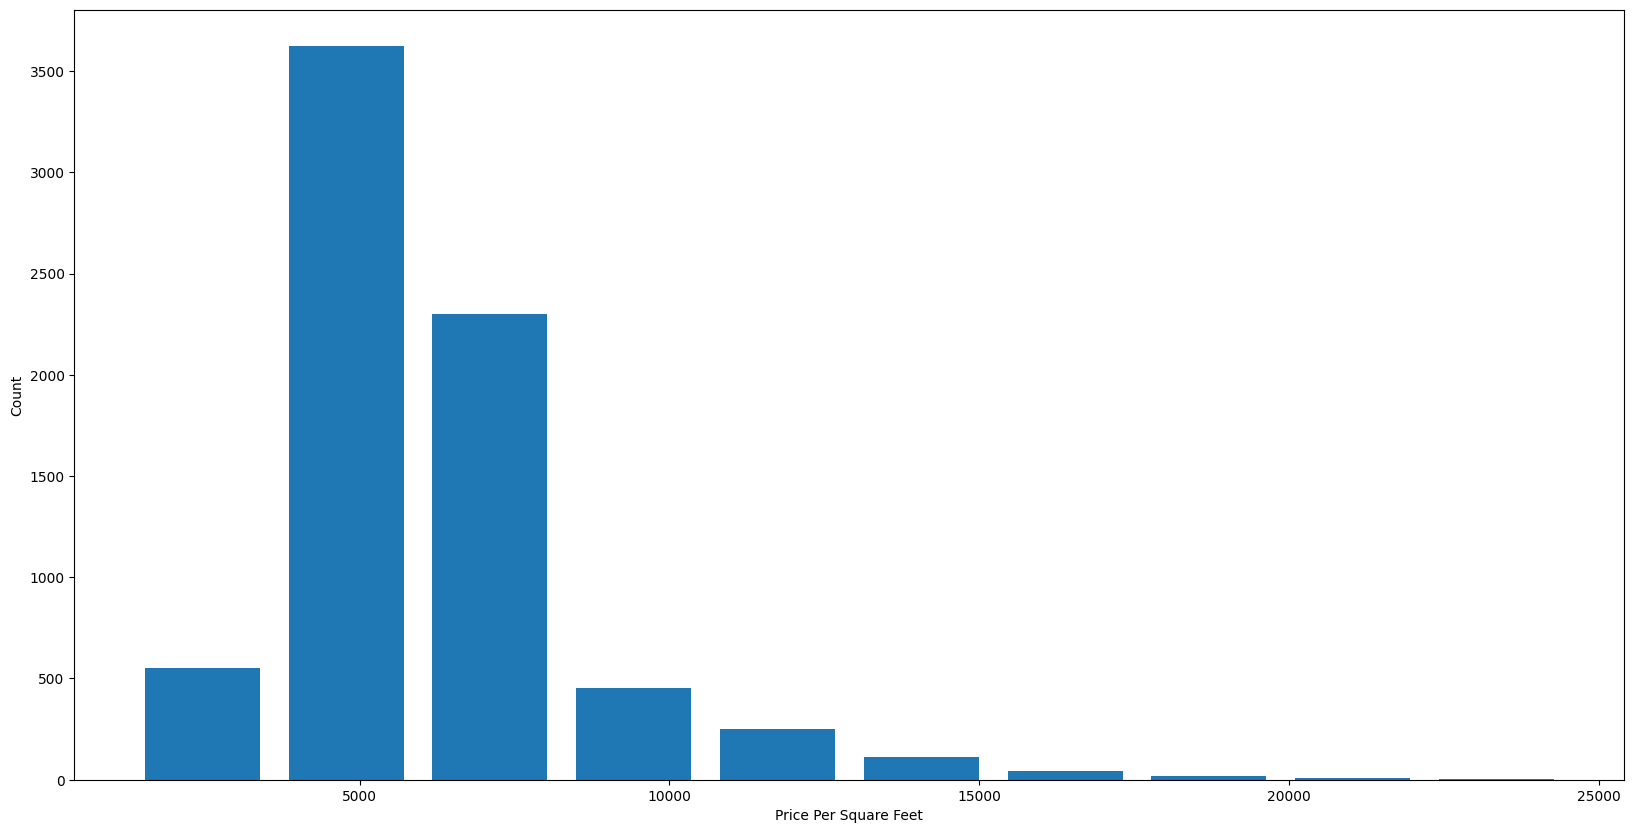

In [ ]:
# Step 4
# Plot histogram
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8['price/sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
# Step 5
# Remove excessive number of bathrooms
df9 = df8[df8.bath<df8.bath+2]
df9.shape

(7369, 7)

In [ ]:
# Step 6
# Drop uncessary features for model training
df10 = df9.drop(['size','price/sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# **Model Building**

In [ ]:
# Step 1
# Covert text into a numeric form using one-hot encoding
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)
# Step 2
df12 = df11.drop('location',axis='columns')

In [ ]:
x = df12.drop('price',axis='columns')
y = df12.price

In [ ]:
# Step 3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8759867884669501

In [ ]:
# Step 5
# Prediction

def predict(location,sqft,bath,bhk):
  index = np.where(x.columns==location)[0][0]

  a = np.zeros(len(x.columns))
  a[0] = sqft
  a[1] = bath
  a[2] = bhk
  if index >=0:
    a[index] = 1

  return model.predict([a])[0]

predict('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.32287300720243

# **Neural Network**

* Just for comparison, there is also a neural network developed using the TensorFlow library to evaluate its accuracy relative to the linear regression mode.

In [ ]:
import tensorflow as tf

l0 = tf.keras.layers.Dense(128, input_dim=x_train.shape[1], activation='relu')
l2 = tf.keras.layers.Dense(64, activation='relu')
l6 = tf.keras.layers.Dense(1)  # Output layer for regression
model1 = tf.keras.models.Sequential([l0,l2,l6])

model1.compile(optimizer='adam', loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
model1.fit(x_train, y_train, epochs=400, batch_size=32, validation_split=0.2)
loss = model1.evaluate(x_test, y_test)


def predict(location,sqft,bath,bhk):
  index = np.where(x.columns==location)[0][0]

  a = np.zeros(len(x.columns))
  a[0] = sqft
  a[1] = bath
  a[2] = bhk
  if index >=0:
    a[index] = 1

    a = a.reshape(1, -1)

  return model1.predict([a])[0]

Epoch 1/400
148/148 [==============================] - 1s 3ms/step - loss: 4486.0161 - mean_absolute_percentage_error: 51.4616 - val_loss: 2522.6455 - val_mean_absolute_percentage_error: 60.0634
Epoch 2/400
148/148 [==============================] - 0s 2ms/step - loss: 3642.5247 - mean_absolute_percentage_error: 44.2799 - val_loss: 8093.6411 - val_mean_absolute_percentage_error: 118.7102
Epoch 3/400
148/148 [==============================] - 0s 2ms/step - loss: 4228.2319 - mean_absolute_percentage_error: 46.0008 - val_loss: 2076.1541 - val_mean_absolute_percentage_error: 36.9831
Epoch 4/400
148/148 [==============================] - 0s 2ms/step - loss: 3481.8215 - mean_absolute_percentage_error: 42.7452 - val_loss: 2526.9326 - val_mean_absolute_percentage_error: 26.4161
Epoch 5/400
148/148 [==============================] - 0s 3ms/step - loss: 3394.2168 - mean_absolute_percentage_error: 41.5778 - val_loss: 4279.4043 - val_mean_absolute_percentage_error: 85.6088
Epoch 6/400
148/148 [===

In [ ]:
# Evaluation using R-squared for TensorFlow model (model1)
from sklearn.metrics import r2_score

y_pred = model1.predict(x_test)
r2_tf = r2_score(y_test, y_pred)
print(f'R-squared (TensorFlow Model): {r2_tf}')

47/47 [==============================] - 0s 2ms/step
R-squared (TensorFlow Model): 0.8127359845174775


# **Saving the model and columns**

In [ ]:
# Step 6
# save a trained model to a file using Python's pickle module.
import pickle
with open('model1.pickle','wb') as f:
  pickle.dump(model,f)


In [ ]:
# Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))